In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract


In [5]:
%pip install pdf2image

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pytesseract
from pdf2image import convert_from_path
from pathlib import Path

# Diretório onde os documentos estão localizados
# input_dir = "./Extract"
input_dir = "./Samples"

# Diretório onde os textos de saída serão salvos
output_dir = "./Out"
os.makedirs(output_dir, exist_ok=True)

# Lista de arquivos na pasta de entrada
arquivos = [f for f in os.listdir(input_dir) if f.lower().endswith(".pdf")]

for arquivo in arquivos:
    # Caminho para o arquivo PDF
    pdf_path = os.path.join(input_dir, arquivo)

    # Nome do documento (sem extensão)
    document_name = os.path.splitext(arquivo)[0]

    # Cria um diretório separado para cada documento
    document_output_dir = os.path.join(output_dir, document_name)
    os.makedirs(document_output_dir, exist_ok=True)

    # Converte o PDF em imagens
    pages = convert_from_path(pdf_path)

    for i, page in enumerate(pages):
        # Extrai o texto da página
        page_text = pytesseract.image_to_string(page, lang='por')

        # Nome do arquivo de texto para esta página
        page_text_filename = f'page{i + 1}.txt'

        # Caminho para o arquivo de texto da página
        page_text_path = os.path.join(document_output_dir, page_text_filename)

        # Salva o texto da página em um arquivo de texto
        with open(page_text_path, 'w', encoding='utf-8') as text_file:
            text_file.write(page_text)

        print(f"Texto da página {i + 1} do documento {arquivo} foi salvo em {page_text_path}")


Texto da página 1 do documento 10- AT-05670=0.PDF foi salvo em ./Out\10- AT-05670=0\page1.txt
Texto da página 2 do documento 10- AT-05670=0.PDF foi salvo em ./Out\10- AT-05670=0\page2.txt
Texto da página 3 do documento 10- AT-05670=0.PDF foi salvo em ./Out\10- AT-05670=0\page3.txt
Texto da página 4 do documento 10- AT-05670=0.PDF foi salvo em ./Out\10- AT-05670=0\page4.txt
Texto da página 1 do documento 100001-6245-T25-4-00001..PDF foi salvo em ./Out\100001-6245-T25-4-00001.\page1.txt
Texto da página 2 do documento 100001-6245-T25-4-00001..PDF foi salvo em ./Out\100001-6245-T25-4-00001.\page2.txt
Texto da página 1 do documento 100001-6245-T25-4-00001_VERI.PDF foi salvo em ./Out\100001-6245-T25-4-00001_VERI\page1.txt
Texto da página 2 do documento 100001-6245-T25-4-00001_VERI.PDF foi salvo em ./Out\100001-6245-T25-4-00001_VERI\page2.txt
Texto da página 1 do documento 10001-3621-T34-0-00002.PDF foi salvo em ./Out\10001-3621-T34-0-00002\page1.txt
Texto da página 1 do documento 10001-3621-

KeyboardInterrupt: 

In [6]:
#Open image with open cv

img_cv = cv2.imread("./page1.jpg")

cv2.imshow('Business Card', img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

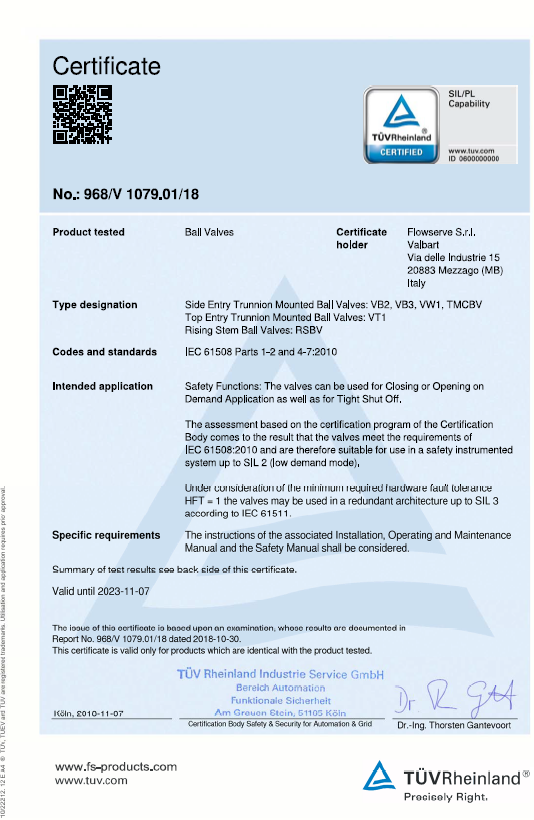

In [2]:
#Open image with PIL
img_pil = PIL.Image.open('./Extract/imgs/teste.png')

img_pil

### Text From Image


In [6]:
txt = pytesseract.image_to_string("./page1.jpg")
print(txt)

N° BRASKEM REV.

MEMORIAL DESCRITIVO Eimissio interna

B ra skem 3 CODIGO DO PROJETO (PJ) N° PROJETISTA FOLHA
PJ-0602140 10001-6208-E31-4-00001 2112

CENTRO LOGISTICO PLANTA AREA
KEMPETRO BA01 -Q1 BA BA01-04 01000
ENGENHARIA TITULO DO PROJETO

MIGRAGAO DOS PLCs FA-M3 DA AREA A1000

SUMARIO FOLHA
1 OBJETIVO 3
2 NORMAS E PROCEDIMENTOS APLICAVEIS 3
2.1 QUANTO A FABRICAGAO, MATERIA-PRIMA E ENSAIOS DOS MATERIAIS 3
2.2 PADROES NORMATIVOS DE ENGENHARIA BRASKEM 3
3. PREMISSAS 3
DESCRICAO DOS SERVICOS 5

4
5 DOCUMENTOS DE REFERENCIA DO PROJETO BASICO 12
6  LISTA DE MATERIAIS 12



In [6]:
%pip install aspose-words

  Obtaining dependency information for aspose-words from https://files.pythonhosted.org/packages/87/96/621f084ddc80858752190528f9367172563088adacbc70b2d771110c7a14/aspose_words-23.10.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/64.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/64.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/64.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/64.6 MB 326.8 kB/s eta 0:03:18
   ---------------------------------------- 0.1/64.6 MB 726.2 kB/s eta 0:01:29
   ---------------------------------------- 0.4/64.6 MB 1.9 MB/s eta 0:00:35
   ---------------------------------------- 0.6/64.6 MB 2.6 MB/s eta 0:00:25
    --------------------------------------- 1.1/64.6 MB 3.9 MB/s eta 0:00:17
    --------------------------------------- 1.5/64.6 MB 4.5 MB/s eta 0:00:14
   - -------------------------------------- 2.1/64.6 MB 5.5 MB/s eta 0:00:12
   - -------------------------

In [4]:
# Importar o módulo Aspose.Words para Python
import aspose.words as aw

# carregue o arquivo PDF e converta para o formato Word DOCX
pdf = aw.Document("document.pdf")
pdf.save("pdf.docx")

# carregue a versão DOCX do PDF
doc = aw.Document("pdf.docx")

# recuperar todas as formas
shapes = doc.get_child_nodes(aw.NodeType.SHAPE, True)
imageIndex = 0

# loop através de formas
for shape in shapes :
    shape = shape.as_shape()
    if (shape.has_image) :

        # definir o nome do arquivo de imagem
        imageFileName = f"Image.ExportImages.{imageIndex}_{aw.FileFormatUtil.image_type_to_extension(shape.image_data.image_type)}"

        # salvar imagem
        shape.image_data.save(imageFileName)
        imageIndex += 1


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rvd\\AppData\\Local\\Temp\\tess_2xjvi40a.pdf'